# E-commerce Shipping Data Analysis

## Content
<p>1. Introduction</p>
<p>2. Objective</p>
<p>3. Getting to Know Data & Variables</p>
<p>4. Data Preparation</p>
<p>5. Data Analysis</p>
<p>6. Modelling & Assessment</p>
<p>7. Conclusion</p>
<p>8. Reference</p>

## 1. Introduction
<p>An international e-commerce company reqeusts data team to discover key insights from customers databse by advance statistical methods and share the result to other teams for improvement project. The company sells electronic products.</p>

## 2. Objective
<p>To initiate service level improvement project for Sales and Operation team.</p>

## 3. Getting to Know Data & Variables

### 3.1 Data Import
<p>Data in csv format is imported.</p>

In [24]:
#Import Data
data<-read.csv("Train.csv")

### 3.2 Data Preview

In [25]:
#Data preview
head(data)

,ï..ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>
1,1,D,Flight,4,2,177,3,low,F,44,1233,1
2,2,F,Flight,4,5,216,2,low,M,59,3088,1
3,3,A,Flight,2,2,183,4,low,M,48,3374,1
4,4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,5,C,Flight,2,2,184,3,medium,F,46,2484,1
6,6,F,Flight,3,1,162,3,medium,F,12,1417,1


<br></br>
<p>From the preview, columns needed to be renamed and looks tidier.</p>
<br></br>

In [26]:
#Tidy up of columns' names
names(data)[1]<-"ID"
names(data)[2]<-"Warehouse_Block"
names(data)[3]<-"Mode_of_Shipment"
names(data)[4]<-"Customer_Care_Calls"
names(data)[5]<-"Customer_Rating"
names(data)[6]<-"Cost_of_Product"
names(data)[7]<-"Prior_Purchases"
names(data)[8]<-"Product_Importance"
names(data)[9]<-"Gender"
names(data)[10]<-"Discount_Offered"
names(data)[11]<-"Weight_in_gms"
names(data)[12]<-"Reached_on_Time"
head(data)
str(data)

,ID,Warehouse_Block,Mode_of_Shipment,Customer_Care_Calls,Customer_Rating,Cost_of_Product,Prior_Purchases,Product_Importance,Gender,Discount_Offered,Weight_in_gms,Reached_on_Time
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>
1,1,D,Flight,4,2,177,3,low,F,44,1233,1
2,2,F,Flight,4,5,216,2,low,M,59,3088,1
3,3,A,Flight,2,2,183,4,low,M,48,3374,1
4,4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,5,C,Flight,2,2,184,3,medium,F,46,2484,1
6,6,F,Flight,3,1,162,3,medium,F,12,1417,1


'data.frame':	10999 obs. of  12 variables:
 $ ID                 : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Warehouse_Block    : chr  "D" "F" "A" "B" ...
 $ Mode_of_Shipment   : chr  "Flight" "Flight" "Flight" "Flight" ...
 $ Customer_Care_Calls: int  4 4 2 3 2 3 3 4 3 3 ...
 $ Customer_Rating    : int  2 5 2 3 2 1 4 1 4 2 ...
 $ Cost_of_Product    : int  177 216 183 176 184 162 250 233 150 164 ...
 $ Prior_Purchases    : int  3 2 4 4 3 3 3 2 3 3 ...
 $ Product_Importance : chr  "low" "low" "low" "medium" ...
 $ Gender             : chr  "F" "M" "M" "M" ...
 $ Discount_Offered   : int  44 59 48 10 46 12 3 48 11 29 ...
 $ Weight_in_gms      : int  1233 3088 3374 1177 2484 1417 2371 2804 1861 1187 ...
 $ Reached_on_Time    : int  1 1 1 1 1 1 1 1 1 1 ...


<br></br>
<p>There are 10,999 records with 12 variables. Below table shows summary of the variales' description and data type.</p>
<br></br>

|   **Variable**    |                           **Description**                   |  **Data Type**  |
|:-----------------:|:------------------------------------------------------------|:----------------|
|ID                 |ID No. of Customers.                                         |Nominal Number   |
|Warehouse Block    |A to E Warehouse block.                                      |Character        | 
|Mode of Shipment   |Ship products by Ship/Flight/Road.                           |Character        | 
|Customer Care Calls|No. of enquiry calls for shipment.                           |Discrete Number  | 
|Customer Rating    |Company is rated by customers.1 is the worst & 5 is the best.|Ordinal Number   | 
|Cost of Product    |Cost of products in USD.                                     |Continuous Number| 
|Prior Purchases    |No. of prior purchases.                                      |Discrete Number  | 
|Product Importance |Company categorizes products in low, medium and high.        |Character        | 
|Gender             |Gender of customers, F/M.                                    |Character        | 
|Discount Offered   |Discount offered on the specific product.                    |Continuous Number| 
|Weight in gms      |Weight of product in grams.                                  |Continuous Number| 
|Reached on Time    |1: Not reach on time 0: Reach on time                        |Binary Number    |

<br></br>
<p>There are 4 variables for character and 8 variables for number. "Reached on Time" and "Customer Rating" can be the target variables for Sales and Operation team to evaluate the service level.</p>
<br></br>

## 4. Data Preparation
### 4.1 Missing Values Detection

In [27]:
#View statistical summary
summary(data)

       ID        Warehouse_Block    Mode_of_Shipment   Customer_Care_Calls
 Min.   :    1   Length:10999       Length:10999       Min.   :2.000      
 1st Qu.: 2750   Class :character   Class :character   1st Qu.:3.000      
 Median : 5500   Mode  :character   Mode  :character   Median :4.000      
 Mean   : 5500                                         Mean   :4.054      
 3rd Qu.: 8250                                         3rd Qu.:5.000      
 Max.   :10999                                         Max.   :7.000      
 Customer_Rating Cost_of_Product Prior_Purchases  Product_Importance
 Min.   :1.000   Min.   : 96.0   Min.   : 2.000   Length:10999      
 1st Qu.:2.000   1st Qu.:169.0   1st Qu.: 3.000   Class :character  
 Median :3.000   Median :214.0   Median : 3.000   Mode  :character  
 Mean   :2.991   Mean   :210.2   Mean   : 3.568                     
 3rd Qu.:4.000   3rd Qu.:251.0   3rd Qu.: 4.000                     
 Max.   :5.000   Max.   :310.0   Max.   :10.000              

<br></br>
<p>No missing values are found as no NA values are displayed from statistical summary.</p>
<br></br>

### 4.2 Outliers Detection
#### 4.2.1 Variables with Continuous and Discrete Values
<p>Boxplot is used to detect outliers for variables with continuous and discrete values.</p>

Package,LibPath,Version,Priority,Depends,Imports,LinkingTo,Suggests,Enhances,License,License_is_FOSS,License_restricts_use,OS_type,Archs,MD5sum,NeedsCompilation,Built


Warning message:
"package 'gridExtra' is in use and will not be installed"


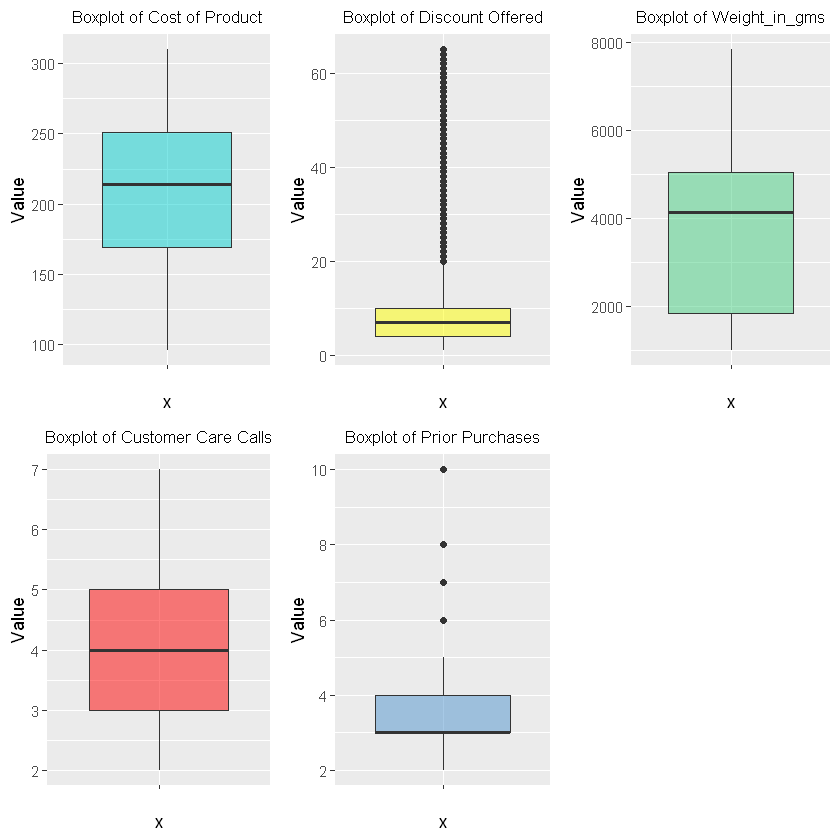

In [28]:
#Installation of necessary packages
installed.packages("ggplot2")
library(ggplot2)
install.packages("gridExtra")
library(gridExtra)

#Boxplot for variables with continuous & discrete values
p1<-ggplot(data,aes(x = "",y = Cost_of_Product))+ 
        geom_boxplot(fill = "cyan3", alpha = 0.5)+
        ggtitle("Boxplot of Cost of Product")+
        theme(plot.title = element_text(hjust = 0.5, size = 10))+
        labs(x="x",y="Value")

p2<-ggplot(data,aes(x = "",y = Discount_Offered))+ 
        geom_boxplot(fill = "yellow", alpha = 0.5)+
        ggtitle("Boxplot of Discount Offered")+
        theme(plot.title = element_text(hjust = 0.5,  size= 10))+
        labs(x="x",y="Value")

p3<-ggplot(data,aes(x = "", y = Weight_in_gms))+
        geom_boxplot(fill = "seagreen3", alpha = 0.5)+
        ggtitle("Boxplot of Weight_in_gms")+
        theme(plot.title = element_text(hjust = 0.5, size = 10))+
        labs(x="x",y="Value")

p4<-ggplot(data,aes(x = "",y = Customer_Care_Calls))+
        geom_boxplot(fill = "red", alpha = 0.5)+
        ggtitle("Boxplot of Customer Care Calls")+
        theme(plot.title = element_text(hjust = 0.5, size = 10))+
        labs(x="x",y="Value")

p5<-ggplot(data,aes(x = "",y = Prior_Purchases))+
        geom_boxplot(fill = "steelblue3", alpha = 0.5)+
        ggtitle("Boxplot of Prior Purchases")+
        theme(plot.title = element_text(hjust = 0.5, size = 10))+
        labs(x="x",y="Value")

#Mulitple plots on the same page
grid.arrange(p1,p2,p3,p4,p5,nrow = 2)

<br></br>
<p>In the boxplot of Discount Offered and Prior Purchases, there are data points larger than maximum that are outliers.</p>
<br></br>

In [29]:
#Find out outliers from the boxplot in Discount Offered
y<-quantile(data$Discount_Offered, probs = c(0.75)) + 1.5 * IQR(data$Discount_Offered)
print((paste("Value of Outliers in Discount Offered: >", y)))
y1<-nrow(data[data$Discount_Offered > y, ])
print((paste("No. of Outliers in Discount Offered:", y1)))

#Find out outliers from the boxplot in Prior Purchases
w<-quantile(data$Prior_Purchases, probs = c(0.75)) + 1.5 * IQR(data$Prior_Purchases)
print((paste("Value of Outliers in Prior Purchases:>", w)))
w1<-nrow(data[data$Prior_Purchases>w, ])
print((paste("No. of Outliers in Prior Purchases:", w1)))

#Remove outliers from Data
data1<-data[data$Discount_Offered <= y & data$Prior_Purchases <= w, ]
dim(data1)

#Find out median without outliers
med1<-median(data1$Discount_Offered)
med2<-median(data1$Prior_Purchases)

#Replace outliers by respective median 
data$Discount_Offered[data$Discount_Offered >= y]<-med1
data$Prior_Purchases[data$Prior_Purchases >= w]<-med2

summary(data)

[1] "Value of Outliers in Discount Offered: > 19"
[1] "No. of Outliers in Discount Offered: 2209"
[1] "Value of Outliers in Prior Purchases:> 5.5"
[1] "No. of Outliers in Prior Purchases: 1003"


[1] 7971   12

       ID        Warehouse_Block    Mode_of_Shipment   Customer_Care_Calls
 Min.   :    1   Length:10999       Length:10999       Min.   :2.000      
 1st Qu.: 2750   Class :character   Class :character   1st Qu.:3.000      
 Median : 5500   Mode  :character   Mode  :character   Median :4.000      
 Mean   : 5500                                         Mean   :4.054      
 3rd Qu.: 8250                                         3rd Qu.:5.000      
 Max.   :10999                                         Max.   :7.000      
 Customer_Rating Cost_of_Product Prior_Purchases Product_Importance
 Min.   :1.000   Min.   : 96.0   Min.   :2.000   Length:10999      
 1st Qu.:2.000   1st Qu.:169.0   1st Qu.:3.000   Class :character  
 Median :3.000   Median :214.0   Median :3.000   Mode  :character  
 Mean   :2.991   Mean   :210.2   Mean   :3.194                     
 3rd Qu.:4.000   3rd Qu.:251.0   3rd Qu.:4.000                     
 Max.   :5.000   Max.   :310.0   Max.   :5.000                     

<br></br>
<p>If outliers are removed and deleted in rows, sample size will be reduced by 28%.This can distort data distribution.Outliers in Discount Offered and Prior Purchases are replaced by respective median to improve data accuracy.</p>
<br></br>

## 5. Data Analysis
<p>Customer Rating is the target variable to measure service level performance. Visualise the relationship bewteen Reached on Time and Customer Rating. More details are shown as below.</p>

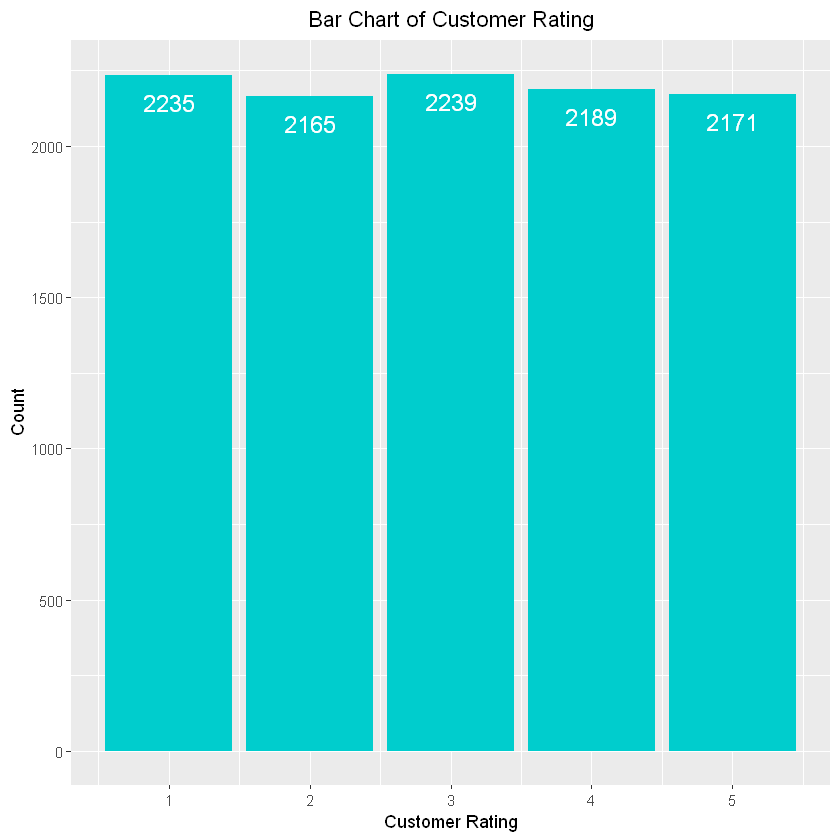

In [30]:
#Bar chart of Customer Rating
p6<-ggplot(data, aes(x = Customer_Rating)) + 
        geom_bar(fill = "cyan3") +
        ggtitle("Bar Chart of Customer Rating") +
        theme(plot.title = element_text(hjust = 0.5)) +
        geom_text(aes(label = ..count..), stat = "count", colour = "white", size = 5, hjust = 0.5, vjust = 2) +
        labs(x = "Customer Rating", y = "Count")
p6        

<br></br>
<p>There is even distribution in Customer Rating. </p>
<br></br>

### 5.1 Reached on Time & Customer Rating
<p>Reached on Time is selected to evaluate Customer Rating as punctual shipping service is one of the basic reqiurements from customers.</p>

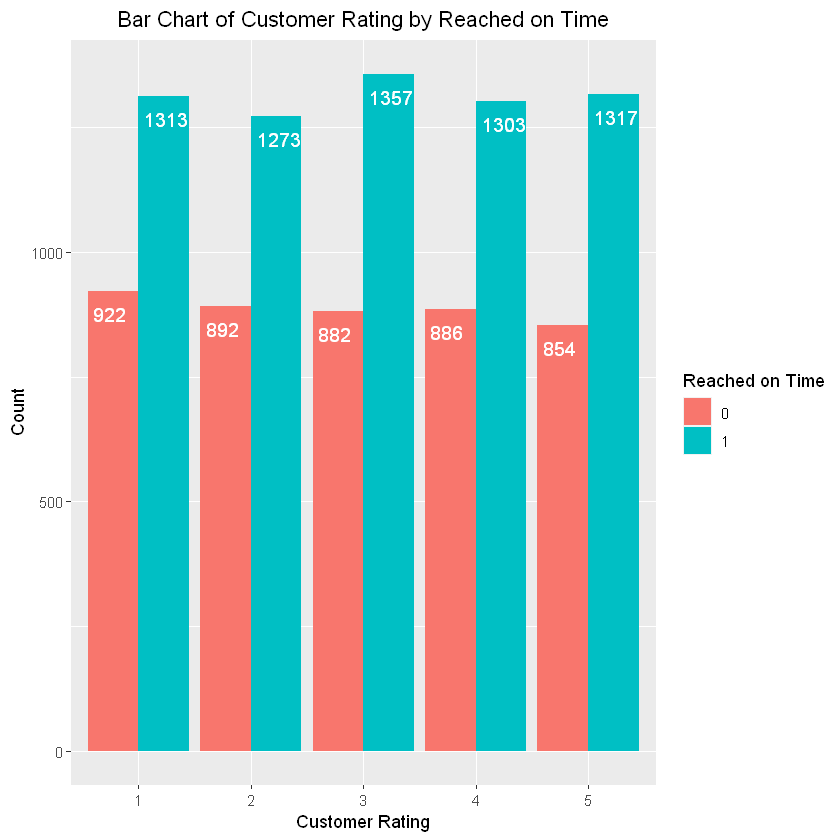

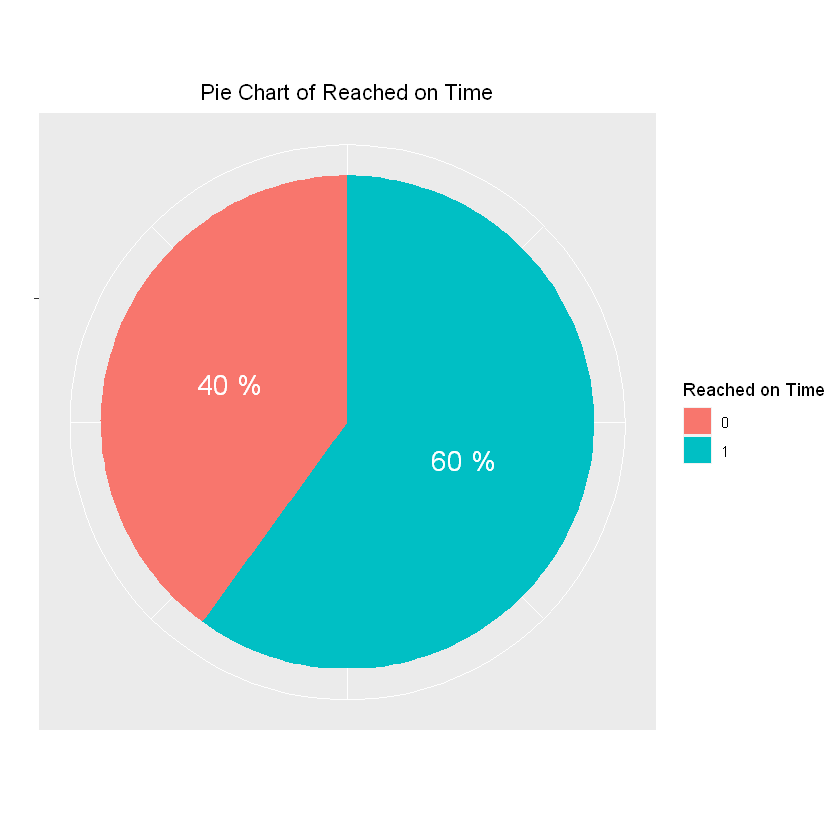

In [31]:
#Bar chart of Reached on Time
p7<-ggplot(data, aes(fill = as.factor(Reached_on_Time), x = as.factor(Customer_Rating))) + 
        geom_bar(position = "dodge") +
        ggtitle("Bar Chart of Customer Rating by Reached on Time") +
        theme(plot.title = element_text(hjust = 0.5)) +
        geom_text(aes(label = ..count..), stat = "count", colour = "white", position = position_dodge(width = 1), size = 4, vjust = 2) +
        labs(x = "Customer Rating", y = "Count", fill = "Reached on Time")
p7

#Pie chart of Reached on Time
#Compute percentages for Reached on Time
reach<-nrow(data)
reach0<-nrow(data[data$Reached_on_Time == 0, ])
reach1<-nrow(data[data$Reached_on_Time == 1, ])
reach0p<-round(reach0 / reach * 100, 0)
reach1p<-round(reach1 / reach * 100, 0)

#Data frame of pie chart
df<-data.frame(group = c("0", "1"), value = c(reach0p, reach1p))

#Pie chart
p8<-ggplot(df, aes(x = "", y = value, fill = group)) +
        geom_bar(width = 1, stat = "identity") +
        coord_polar("y", start = 0) +
        ggtitle("Pie Chart of Reached on Time") +
        theme(axis.text.x = element_blank(), plot.title = element_text(hjust = 0.5)) +
        labs(x = "", y = "", fill = "Reached on Time") +
        geom_text(aes(label = paste(value,"%")), color = "white", size = 6, position = position_stack(vjust = 0.5))
p8

<br></br>
<p>The customer rating distribution is even for both delivery conditions, reached on time and not reached on time. So, delivery time is not the key factor to affect customer rating. However, more than half of prodcuts can't reach on time that is the trigger point to know reason behind and suggest potential improvement. Mode of Shipment, Warehouse Block and Weight in gms are selected to investigate the delivery service perforamnce.</p>
<br></br>

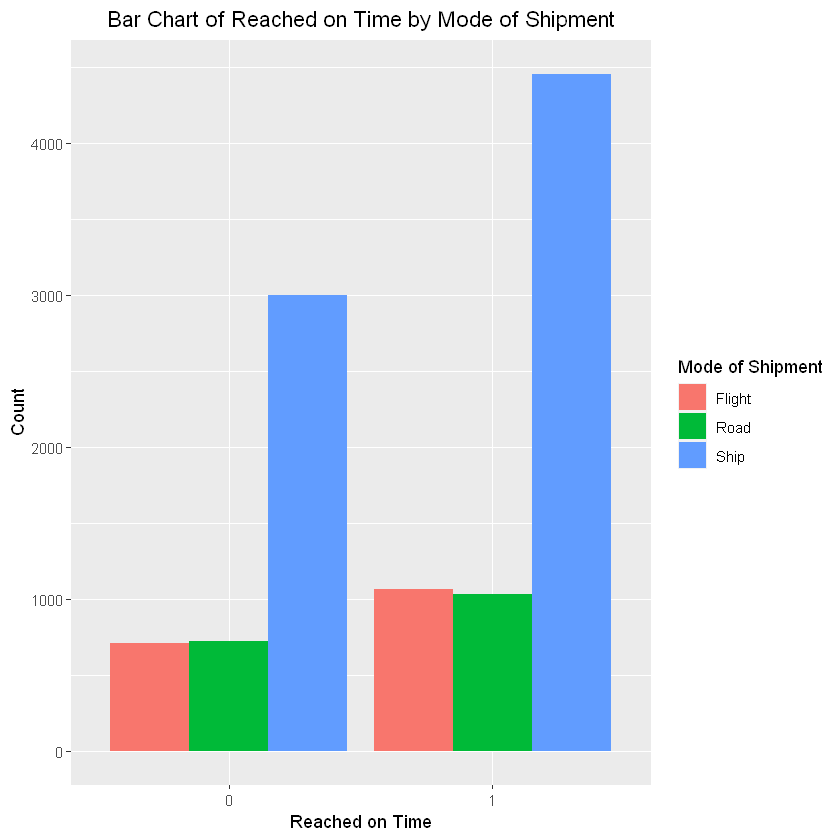

In [32]:
#Bar chart of Reached on Time by Mode of Shipment
p9<-ggplot(data, aes(fill = Mode_of_Shipment,x = as.factor(Reached_on_Time))) + 
        geom_bar(position = "dodge") +
        ggtitle("Bar Chart of Reached on Time by Mode of Shipment") +
        theme(plot.title = element_text(hjust = 0.5)) +
        labs(x = "Reached on Time",y = "Count",fill = "Mode of Shipment")
p9

<br></br>
<p>The delivery performance of all three modes is bad. Shipping is the most common delivery method in this company. To maximize the improvement on delivery performance, we can communicate with operation team and know more about the operation flow of shipping.</p>
<br></br>

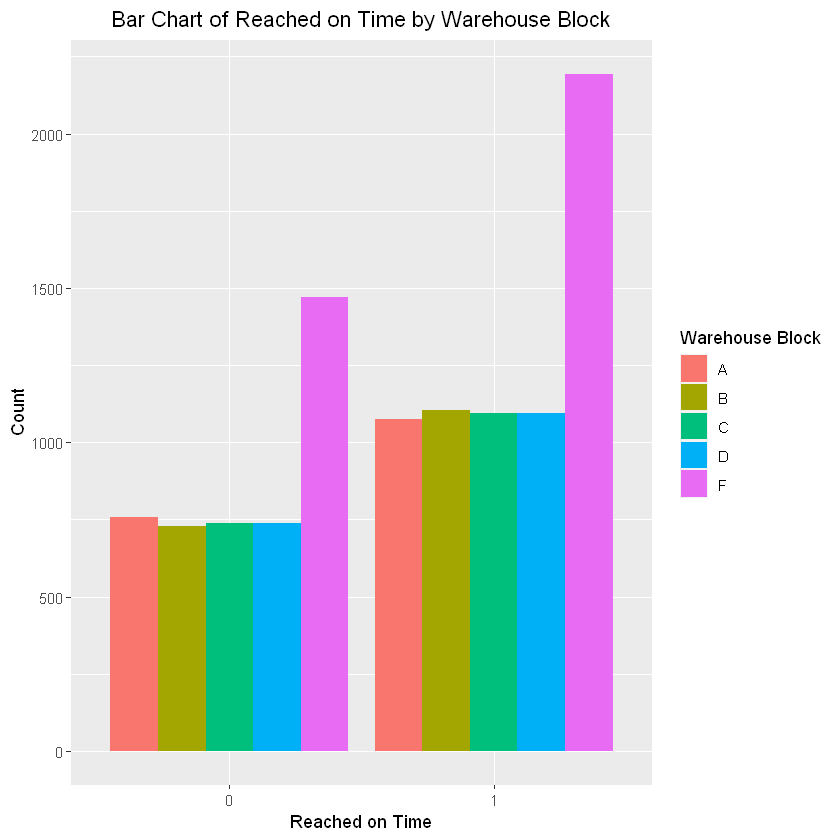

In [33]:
#Bar chart of Reached on Time by Warehouse Block
p10<-ggplot(data, aes(fill = Warehouse_Block,x = as.factor(Reached_on_Time))) + 
        geom_bar(position = "dodge") +
        ggtitle("Bar Chart of Reached on Time by Warehouse Block") +
        theme(plot.title = element_text(hjust = 0.5)) +
        labs(x = "Reached on Time",y = "Count",fill = "Warehouse Block")
p10

<br></br>
<p>The delivery performance of all six warehouse is bad. Warehouse Block F is the busiest block in this company. To maximize the improvement on delivery performance, we can communicate with operation team and know more about the operation flow in Warehouse Block F.</p>
<br></br>

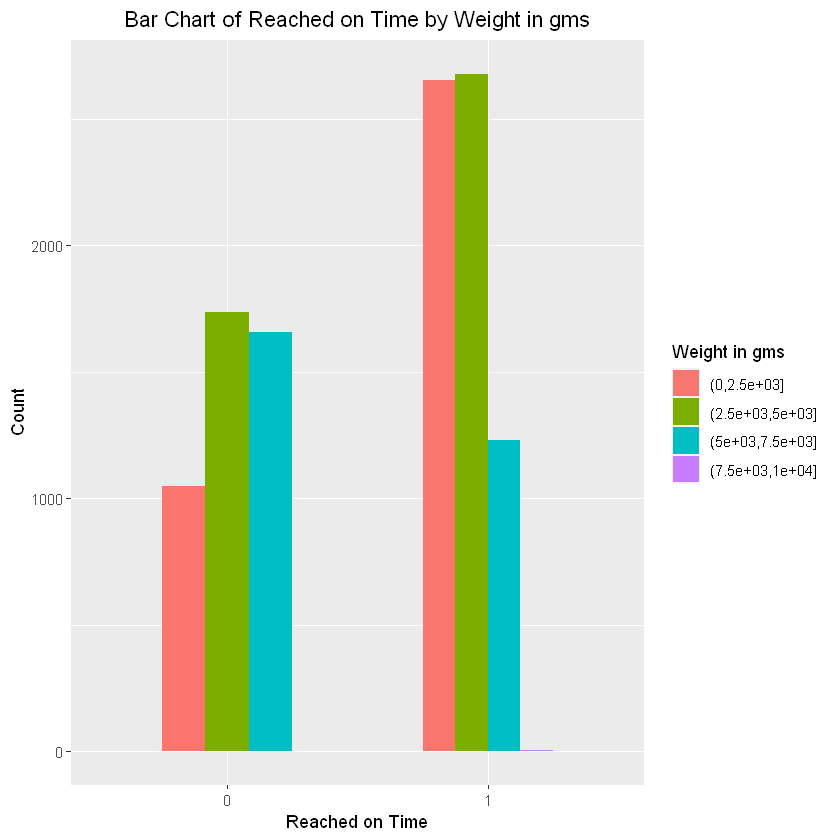

In [34]:
#Create new column to categorize Weight in gms
data$Weight_in_gms1<-cut(data$Weight_in_gms, c(0,2500,5000,7500,10000))

#Bar chart of Reached on Time by Weight in gms1
p11<-ggplot(data, aes(fill = Weight_in_gms1,x = as.factor(Reached_on_Time))) + 
        geom_bar(position = "dodge", width=0.5) +
        ggtitle("Bar Chart of Reached on Time by Weight in gms") +
        theme(plot.title = element_text(hjust = 0.5)) +
        labs(x = "Reached on Time",y = "Count", fill = "Weight in gms")
p11

<br></br>
<p>Wight in gms is transformed from continuous to categorical variable by grouping into 4 groups, (0,2500], (2500,5000] (5000,7500] and (7500,10000] which can helps to visualise the relationship between Reached on Time and Weight in gms.</p>
<p>Group (5000,7500] have better delivery performance than group (0,2500], and (7500,10000].</p>
<br></br>

<br></br>
<p>In conclusion, delivery time is not the key factor to determine cusotmer rating. However, it is important to address that more than half of products can't be delivered on time. More details of shipping mode, Warehouse Block F and weight group (0,2500] and (2500,5000] should be found to initiate delivery time improvement project. </p>
<br></br>

### 5.2 Highest & Lowest Customer Rating 

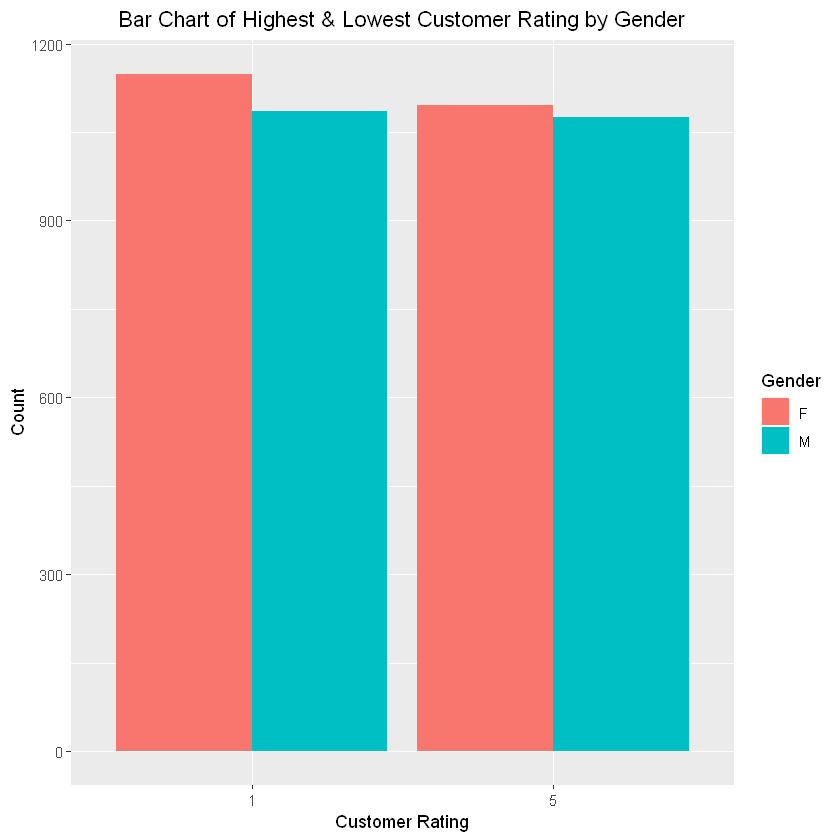

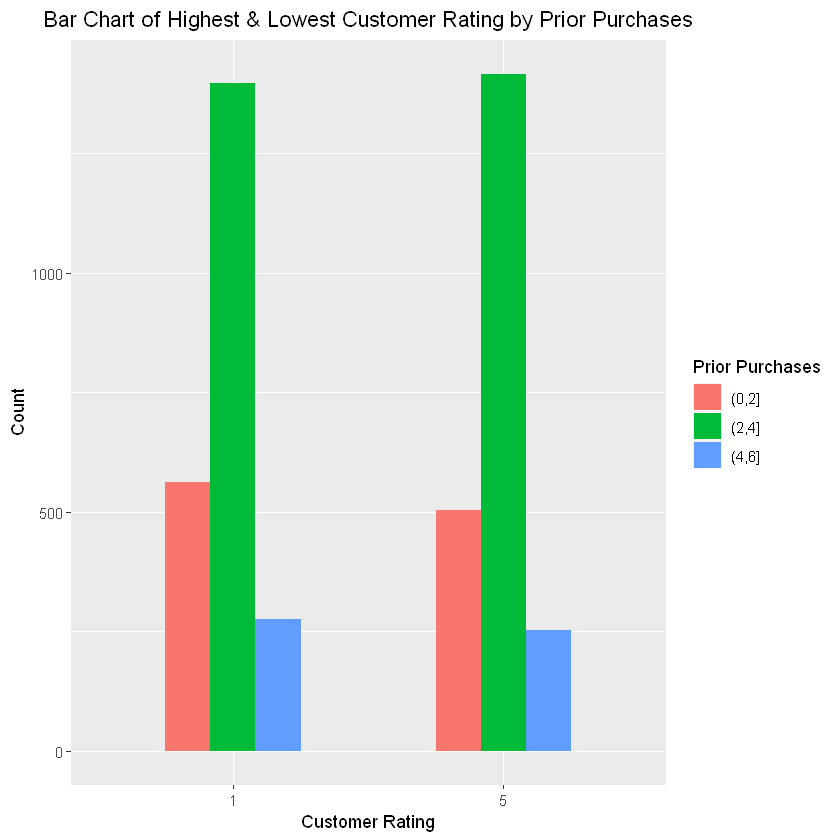

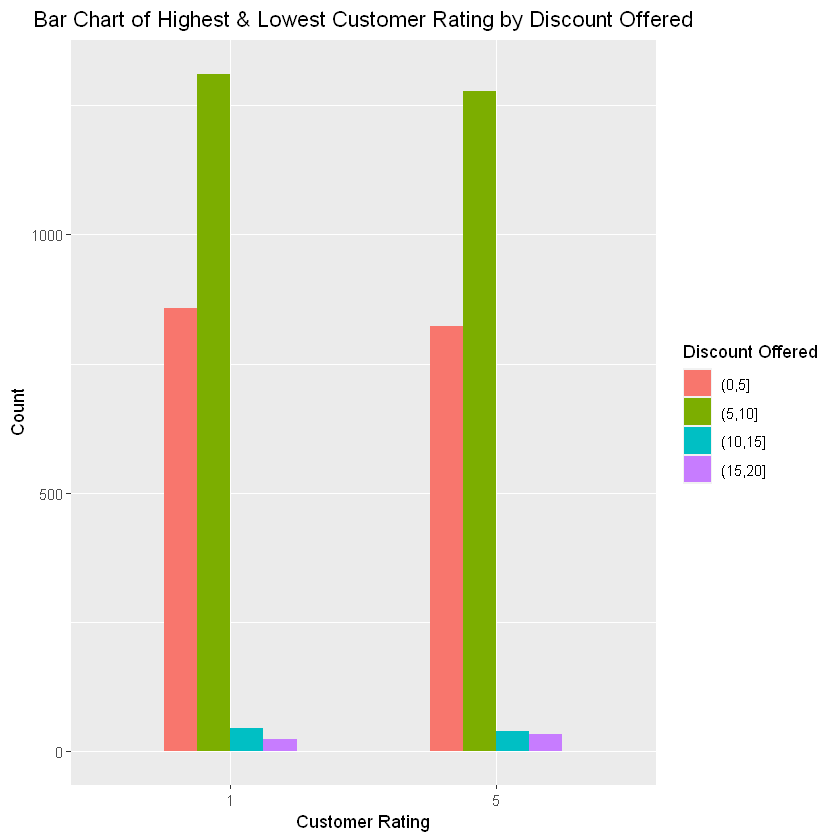

In [35]:
#Data with highest & lowest Customer Rating
data1<-data[data$Customer_Rating == 1 | data$Customer_Rating == 5 ,]

#Bar Chart of Highest & Lowest Customer Rating by Gender
p12<-ggplot(data1, aes(x = as.factor(Customer_Rating), fill = Gender)) + 
        geom_bar(position = "dodge") +
        ggtitle("Bar Chart of Highest & Lowest Customer Rating by Gender") +
        theme(plot.title = element_text(hjust = 0.5)) +
        labs(x = "Customer Rating", y = "Count")
p12


#Create new column to categorize Prior Purchases
data1$Prior_Purchases1<-cut(data1$Prior_Purchases, c(0,2,4,6,8,10))

#Bar chart of Highest & Lowest Customer Rating by Prior Purchases
p13<-ggplot(data1, aes(fill = Prior_Purchases1,x = as.factor(Customer_Rating))) + 
        geom_bar(position = "dodge", width=0.5) +
        ggtitle("Bar Chart of Highest & Lowest Customer Rating by Prior Purchases") +
        theme(plot.title = element_text(hjust = 0.5)) +
        labs(x = "Customer Rating",y = "Count", fill = "Prior Purchases")
p13


#Create new column to categorize Discount Offered
data1$Discount_Offered1<-cut(data1$Discount_Offered, c(0,5,10,15,20))

#Bar chart of Highest & Lowest Customer Rating by Prior Purchases
p14<-ggplot(data1, aes(fill = Discount_Offered1,x = as.factor(Customer_Rating))) + 
        geom_bar(position = "dodge", width=0.5) +
        ggtitle("Bar Chart of Highest & Lowest Customer Rating by Discount Offered") +
        theme(plot.title = element_text(hjust = 0.5)) +
        labs(x = "Customer Rating",y = "Count", fill = "Discount Offered")
p14

<br></br>
<p>Focused on the highest and lowest Customer Rating, it is difficult to find the rating reason by Gender, Prior Purchases and Discount Offered. Gender distribution between them is similar. More, most of them have 2 to 4 times of prior purchases and get 5 to 10 dollars discount.</p>
<br></br>

### 5.3 Correlation among Variables

Installing package into 'C:/Users/Tiffany Chung/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'ggcorrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Tiffany Chung\AppData\Local\Temp\Rtmpme3I3F\downloaded_packages


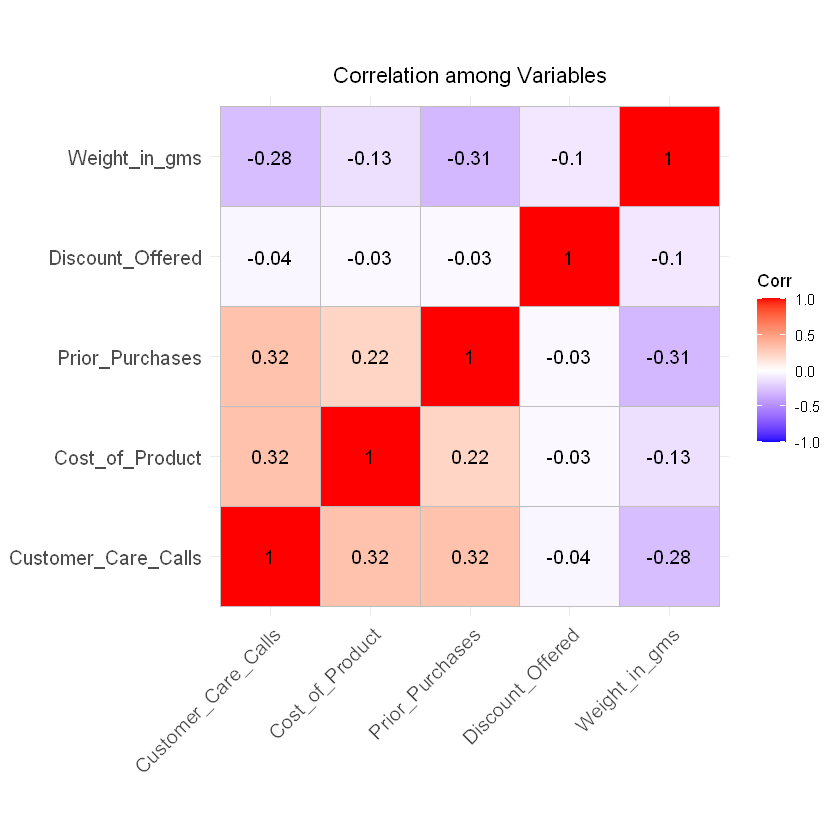

In [36]:
#Install required packages
install.packages("ggcorrplot")
library(ggcorrplot)

#Correlation of data
p15<-ggcorrplot(cor(data[,c(4,6,7,10,11)]),lab = TRUE) +
        ggtitle("Correlation among Variables") +
        theme(plot.title = element_text(hjust = 0.5))
p15

<br></br>
<p>(1) Customers Care Calls & Cost of Product, (2) Customers Care Calls & Prior Purchases, and (3) Cost of Product & Prior Purchases have weak positive relationship. One variable increases, another variable also increases.</p>
<p>(4) Customers Care Calls & Weight in gms, (5) Cost of Product & Weight in gms, and (6) Prior Purchases & Weight in gms have weak negative relationship. One variable increases, another variable decreases.</p>
<br></br>

## 6. Modelling & Assessment
### 6.1 Objective
<p>To predict Reached on Time by logistic regression.</p>

### 6.2 Transformation
#### 6.2.1 Transformation for Continuous and Discrete Variables

In [37]:
#Variance of continuous and discrete Variables
var_vector<-apply(data[ , c(4,6,7,10,11)], 2, var)
max(var_vector) / min(var_vector)

[1] 3099599

<br></br>
<p>The variations of variables diff greatly and the variables are in different units, so standardization is used to prevent some variables dominating the result.</p>
<br></br>

In [1]:
#Standardization of continuous and discrete Variables
s<-scale(data[ , c(4,6,7,10,11)])
data[ ,c(4,6,7,10,11)]<-s[ , ]

ERROR: Error in data[, c(4, 6, 7, 10, 11)]: object of type 'closure' is not subsettable


### 6.3 Analysis

In [40]:
#Set seed
set.seed(1234)

#Set sample ratio
r<-2/3

#Split data into training Data and testing Data
n<-nrow(data)
id<-sample(1:n, size = round(r * n), replace = F)
train<-data[id,]
test<-data[-id,]

#Logistic regression
lreg<-glm(Reached_on_Time ~ Customer_Care_Calls + Customer_Rating + Cost_of_Product + Prior_Purchases + Discount_Offered + Weight_in_gms, data = train, binomial)
summary(lreg)


Call:
glm(formula = Reached_on_Time ~ Customer_Care_Calls + Customer_Rating + 
    Cost_of_Product + Prior_Purchases + Discount_Offered + Weight_in_gms, 
    family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3412  -1.1410   0.5680   0.9919   2.0646  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)          0.39921    0.05954   6.705 2.02e-11 ***
Customer_Care_Calls -0.25392    0.02881  -8.815  < 2e-16 ***
Customer_Rating      0.02524    0.01802   1.401    0.161    
Cost_of_Product     -0.14539    0.02771  -5.246 1.55e-07 ***
Prior_Purchases     -0.35130    0.02857 -12.297  < 2e-16 ***
Discount_Offered     0.14065    0.02646   5.316 1.06e-07 ***
Weight_in_gms       -0.82684    0.03105 -26.630  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 9883.1  on 7332  degrees of freedom
Residual d

<br></br>
<p>Backware elimination is performed to access final model. From the result, Customer Rating is removed from data as it has large p-value.</p>
<br></br>

In [41]:
#Logistic regression
lreg<-glm(Reached_on_Time ~ Customer_Care_Calls + Cost_of_Product + Prior_Purchases + Discount_Offered + Weight_in_gms, data = train, binomial)
summary(lreg)

#Logistic regression assessment
# pr=T if prob>0.5
pr1<-lreg$fit > 0.5 

#Classification table
t1<-table(pr1, train$Reached_on_Time) 
t1



Call:
glm(formula = Reached_on_Time ~ Customer_Care_Calls + Cost_of_Product + 
    Prior_Purchases + Discount_Offered + Weight_in_gms, family = binomial, 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3203  -1.1406   0.5683   0.9916   2.0856  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)          0.47434    0.02608  18.189  < 2e-16 ***
Customer_Care_Calls -0.25356    0.02880  -8.803  < 2e-16 ***
Cost_of_Product     -0.14532    0.02771  -5.245 1.57e-07 ***
Prior_Purchases     -0.35113    0.02857 -12.290  < 2e-16 ***
Discount_Offered     0.14037    0.02645   5.306 1.12e-07 ***
Weight_in_gms       -0.82657    0.03105 -26.622  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 9883.1  on 7332  degrees of freedom
Residual deviance: 8901.0  on 7327  degrees of freedom
AIC: 8913

Number of Fisher Scorin

       
pr1        0    1
  FALSE 1269  975
  TRUE  1680 3409

<br></br>
<p>For the finalized logistic regression model, Customer Care Calls, Cost of Product, Prior Purchases, Discount Offered, Weight in gms have small p-values. With 95% confidence level, assume that there is an association between Reached on Time and these independent variables. All varibles, except Discount Offered, have negative relationship with the target variable.</p>
<br></br>

In [42]:
#Prediction of testing data
pr2<-predict(lreg, test)
prob<-exp(pr2) / (1+exp(pr2))
cl<-prob > 0.5 
t2<-table(cl,test$Reached_on_Time)
t2

#Prediction assessment
paste("Accuracy:", accuracy<-round(sum(diag(t2)) / sum(t2[ , ]), 2))

paste("Precision:", precision<-round(t2[2,2] / sum(t2[2, ]), 2))

paste("Recall:", recall<-round(t2[2,2] / sum(t2[ ,2]), 2))

paste("F1 Score:", F1<-round((2 * precision * recall) / (precision + recall), 2))

       
cl         0    1
  FALSE  601  494
  TRUE   886 1685

[1] "Accuracy: 0.62"

[1] "Precision: 0.66"

[1] "Recall: 0.77"

[1] "F1 Score: 0.71"

<br></br>
<p>Four measures are chosen to assess this model, accuracy, precision, recall, and F1 score. Accuracy is not good, only 0.62 of probability to make correct predictions (TP & TN) over the entire data. As it is intuitive measurement, more details are drilled by precision, recall and F1 score.</p>

<p>Precision is higher than accuracy. It has 0.66 of probability to make true positive over all positive predictions made (i.e. TP / (TP + FP)). If there is false postive in prediciton, the company may need to compensate for delivery delay and get bad influence on reputation.</p>

<p>Recall is higher than accuracy. It has 0.77 of probability to true postive over all positive cases in data (i.e. TP / (TP + FN)). If there is false negative in prediction, the company may get loss of wrong compensation cost and bad reputation for fake delayed devliery. </p>

<p>F1 score is higher than accuracy. It is harmonic mean of precision and recall and more resistant to outliers. It is applied in this model as data is imbalanced and positive cases are much less than negative cases.</p>

<p>In conclusion, this model has good performance for prediction. It can help the company can to prepare operation and business plans under different scenarios, such as delivery insurance, urgent delivery arrangement, etc.</p>

<br></br>

## 7. Conclusion

<br></br>
<p>In conclusion, serivce level and customer rating are not good in this company. More details should be provided by the company for improvement projects. A logistic regression model is bulit for delivery time prediction to prepare for incidents.</p>
<br></br>

## 8. Reference
### (1) Kaggle, E-Commerce Shipping Data
<p>Prachi Gopalani (Mar 2021). E-Commerce Shipping Data.</p>
<p>https://www.kaggle.com/prachi13/customer-analytics</p>